<a href="https://colab.research.google.com/github/bibersay/Deep-Project/blob/main/ResNet50V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models, layers, losses, optimizers, utils
import cv2
import numpy as np
from keras.applications.resnet_v2 import ResNet50V2

In [ ]:
(x_train, y_train) , (x_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [ ]:
model = ResNet50V2(include_top = True, weights=None, input_shape=(32,32,3), classes = 10)

In [ ]:
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                         

In [ ]:
model.compile(optimizer = 'adam',
              loss = losses.categorical_crossentropy,
              metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size=512, epochs=2, validation_data= (x_test,y_test), verbose=1)

Epoch 1/2
98/98 [==============================] - 50s 271ms/step - loss: 1.6987 - accuracy: 0.3990 - val_loss: 2.0074 - val_accuracy: 0.2639
Epoch 2/2
98/98 [==============================] - 18s 186ms/step - loss: 1.2831 - accuracy: 0.5408 - val_loss: 1.6087 - val_accuracy: 0.4158


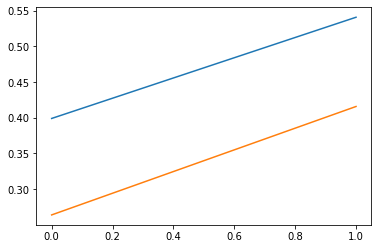

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()